Phase 1 — Data Loading & Initial Inspection
----
Purpose: Understand the dataset’s shape, structure, and variable types.

In [48]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Load dataset
bank_df = pd.read_excel(r"C:\Users\Emigb\Documents\Data Science\Joe Bass\DataInBrief_Bankdata.xlsx")

In [50]:
#Inspecting Data
# Inspecting Data

print("Shape of DataFrame:")
print(bank_df.shape)
print()  # Blank line

print("DataFrame Info:")
print(bank_df.info())
print()  # Blank line

print("First 5 Rows:")
print(bank_df.head())


Shape of DataFrame:
(675, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A_1_AGE         675 non-null    int64  
 1   LOY_1           675 non-null    int64  
 2   QUAL_1          675 non-null    int64  
 3   QUAL_2          675 non-null    int64  
 4   QUAL_4          675 non-null    int64  
 5   QUAL_5          675 non-null    int64  
 6   QUAL_6          675 non-null    int64  
 7   QUA_7           675 non-null    int64  
 8   PERF_1          675 non-null    int64  
 9   PERF_2          675 non-null    int64  
 10  PERF_3          675 non-null    int64  
 11  PERF_4          675 non-null    int64  
 12  PERF_5          675 non-null    int64  
 13  CSOR_1          675 non-null    int64  
 14  CSOR_2          675 non-null    int64  
 15  CSOR_3          675 non-null    int64  
 16  CSOR_4          675 non-null    i

In [51]:
#Standardizing Columns
bank_df.columns = (bank_df.columns.str.strip()
                  .str.lower()
                  .str.replace(' ','_')
                  .str.replace('__', '_'))

In [52]:
bank_df.head()

,a_1_age,loy_1,qual_1,qual_2,qual_4,qual_5,qual_6,qua_7,perf_1,perf_2,...,loy_3,trust_1,trust_2,trust_3,trust_4,d_1_gender,d_2_family,d_3_education,d_4_employment,d_6_income
0,4,7,7,7,7,6,6,6,7,7,...,4,7,7,7,7,1,4,2,3,4
1,5,6,4,4,5,4,4,4,4,4,...,3,4,4,4,4,1,0,6,0,0
2,3,7,7,7,7,7,7,1,7,7,...,7,7,7,7,7,0,4,5,7,4
3,3,7,7,7,7,6,6,4,7,6,...,7,6,6,4,4,1,4,3,7,4
4,2,7,6,6,6,5,6,4,7,7,...,4,7,6,6,6,1,2,6,7,0


Phase 2 — Variable Mapping
----
Purpose: Separate measurement constructs from demographics.

In [53]:
bank_df.columns

Index(['a_1_age', 'loy_1', 'qual_1', 'qual_2', 'qual_4', 'qual_5', 'qual_6',
       'qua_7', 'perf_1', 'perf_2', 'perf_3', 'perf_4', 'perf_5', 'csor_1',
       'csor_2', 'csor_3', 'csor_4', 'csor_5', 'attr_1', 'attr_2', 'attr_3',
       'attr_4', 'like_1', 'like_2', 'comp_1', 'comp_2', 'comp_3', 'sat_1',
       'sat_2', 'sat_3', 'loy_2', 'loy_3', 'trust_1', 'trust_2', 'trust_3',
       'trust_4', 'd_1_gender', 'd_2_family', 'd_3_education',
       'd_4_employment', 'd_6_income'],
      dtype='object')

In [54]:
#Defining constructs
constructs = {
    'qual':[c for c in bank_df.columns if c.startswith('qual')],
    'perf':[c for c in bank_df.columns if c.startswith('perf')],
    'csor':[c for c in bank_df.columns if c.startswith('csor')],
    'attr':[c for c in bank_df.columns if c.startswith('attr')],
    'like':[c for c in bank_df.columns if c.startswith('like')],
    'comp':[c for c in bank_df.columns if c.startswith('comp')],
    'sat':[c for c in bank_df.columns if c.startswith('sat')],
    'loy':[c for c in bank_df.columns if c.startswith('loy')],
    'trust':[c for c in bank_df.columns if c.startswith('trust')],
}

In [55]:
#Defining Demographic variables
demographics =['a_1_age','d_1_gender','d_2_family','d_3_education','d_4_employment', 'd_6_income']

Phase 3 — Missing Data Analysis
----

Purpose: Check completeness and patterns.


In [56]:
#Summarzing missing values
missing = bank_df.isnull().sum()
missing_percent = (missing/len(bank_df) * 100).round(2)
missing_df = pd.DataFrame({'count':missing, 'percent':missing_percent})
print(missing_df.sort_values('percent', ascending=False).head(10))

         count  percent
csor_5       3     0.44
loy_1        0     0.00
qual_1       0     0.00
qual_2       0     0.00
qual_4       0     0.00
qual_5       0     0.00
qual_6       0     0.00
qua_7        0     0.00
a_1_age      0     0.00
perf_1       0     0.00


In [60]:
#Dropping missing values
bank_df.dropna(subset=['csor_5'], inplace=True)

assert bank_df['csor_5'].isna().sum() == 0,"Some rows with missing values in column1 still remain."

Phase 4 — Demographic Profile Analysis
----

Purpose: Validate distributions vs PDF reference.

In [62]:
#Gender distribution
gender_map = {1: 'Female', 0: 'Male'}
(bank_df['d_1_gender'].map(gender_map).value_counts(normalize=True) * 100)


d_1_gender
Female    58.184524
Male      41.815476
Name: proportion, dtype: float64

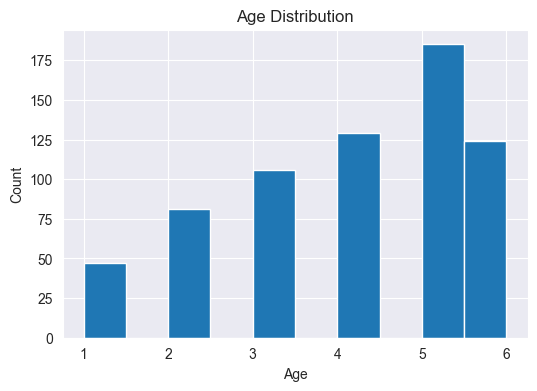

In [64]:
#Age distribution
plt.figure(figsize=(6,4))
bank_df['a_1_age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [65]:
# 10. Cross-tab example: Education vs Employment
pd.crosstab(bank_df['d_3_education'], bank_df['d_4_employment'])

d_4_employment,0,1,2,3,4,5,6,7
d_3_education,,,,,,,,
0,1,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,1,2,15,9,0,0,0,13
3,5,7,44,7,6,1,6,76
4,1,0,6,1,1,2,1,14
5,0,2,13,2,2,23,7,36
6,4,7,64,12,2,1,13,125
7,2,3,31,4,2,6,11,79
